In [51]:
!pip install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
sc.settings.verbosity = 3            
sc.settings.set_figure_params(dpi=80)
%matplotlib inline

In [53]:
input_file = 'data_mrna_seq_v2_rsem.txt'
df = pd.read_table(input_file, sep='\t')
df

,Hugo_Symbol,Entrez_Gene_Id,TCGA-05-4244-01,TCGA-05-4249-01,TCGA-05-4250-01,TCGA-05-4382-01,TCGA-05-4384-01,TCGA-05-4389-01,TCGA-05-4390-01,TCGA-05-4395-01,...,TCGA-NJ-A4YG-01,TCGA-NJ-A4YI-01,TCGA-NJ-A4YP-01,TCGA-NJ-A4YQ-01,TCGA-NJ-A55A-01,TCGA-NJ-A55O-01,TCGA-NJ-A55R-01,TCGA-NJ-A7XG-01,TCGA-O1-A52J-01,TCGA-S2-AA1A-01
0,NaN,100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,NaN,100133144,10.0113,7.1957,7.2453,11.3311,3.2254,4.0000,7.1084,3.4360,...,11.7148,3.6657,2.3298,16.3214,20.3514,15.5193,8.4195,42.9857,14.0861,20.5338
2,UBE2Q2P2,100134869,11.2820,12.4436,6.0184,7.5740,3.4942,13.7852,7.5810,12.1335,...,11.9573,9.7617,8.3410,7.5330,17.2393,22.9872,10.3226,81.1128,24.1914,8.9500
3,HMGB1P1,10357,49.5994,90.5117,49.5366,82.8303,72.5351,66.3658,109.1810,57.0596,...,163.5740,130.7490,101.7400,82.4231,100.4200,100.1870,74.7210,85.3715,61.1388,76.9265
4,NaN,10431,848.9400,924.0160,1140.6800,807.1730,562.0040,1342.6200,1148.3300,955.9140,...,919.1690,403.4910,918.9530,995.6060,536.7600,873.9790,766.7450,677.7330,1137.3200,565.4330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,ZYG11A,440590,0.6981,20.2833,26.5274,64.8514,7.9414,71.8121,7.6641,14.2273,...,15.0115,27.5260,1.2703,73.4463,3.4968,17.5029,52.6221,10.0744,0.4785,6.5520
20527,ZYG11B,79699,1088.0500,787.5060,475.1720,908.1590,778.8640,534.8990,618.2340,264.4130,...,666.2820,825.7800,758.6380,729.4410,675.7580,726.3710,757.8540,531.6540,782.2970,623.0910
20528,ZYX,7791,2837.9400,2351.2500,5437.4500,6770.1500,3341.4800,2565.4400,5256.2700,4949.2200,...,3745.9600,4719.0300,4019.0500,4187.0700,4305.4500,4185.5300,3077.7900,1995.1900,4483.2500,5346.3900
20529,ZZEF1,23140,871.2800,1138.1200,1170.5200,1169.2400,1737.3200,679.1950,780.4570,467.3540,...,641.4550,936.5560,906.5040,1325.8000,1591.9200,1333.7200,1989.3100,1424.1600,1520.5700,1582.9500


In [54]:
df1 = df.set_index("Entrez_Gene_Id").drop("Hugo_Symbol",axis=1).transpose()
df1.rename(columns={"Entrez_Gene_Id": "Sample"}, inplace=True)
df1.head()

Entrez_Gene_Id,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,317712,...,55055,11130,7789,158586,79364,440590,79699,7791,23140,26009
TCGA-05-4244-01,0.0,10.0113,11.2820,49.5994,848.940,0.0,345.2310,1.0472,0.0000,0.0,...,221.164,517.672,39.7940,292.521,959.246,0.6981,1088.050,2837.94,871.28,575.268
TCGA-05-4249-01,0.0,7.1957,12.4436,90.5117,924.016,0.0,145.2020,1.6098,0.0000,0.0,...,198.589,287.507,62.1376,493.560,1179.330,20.2833,787.506,2351.25,1138.12,690.275
TCGA-05-4250-01,0.0,7.2453,6.0184,49.5366,1140.680,0.0,51.7284,0.0000,0.0000,0.0,...,520.899,1046.840,60.0182,365.415,843.903,26.5274,475.172,5437.45,1170.52,532.869
TCGA-05-4382-01,0.0,11.3311,7.5740,82.8303,807.173,0.0,240.0220,0.4786,0.2393,0.0,...,429.630,753.090,40.4424,346.752,946.687,64.8514,908.159,6770.15,1169.24,663.830
TCGA-05-4384-01,0.0,3.2254,3.4942,72.5351,562.004,0.0,274.2820,0.6109,0.0000,0.0,...,258.302,153.940,80.0244,563.225,1320.710,7.9414,778.864,3341.48,1737.32,723.274


In [55]:
df1.shape

(510, 20531)

In [56]:
# Check whether there is NA value in df1
if df1.isna().any().any():
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")


There are no missing values in the DataFrame.


In [57]:
same_value_cols = df.columns[df.nunique() == 1]
print("Columns with the same value throughout the DataFrame:", list(same_value_cols))
print(same_value_cols)

Columns with the same value throughout the DataFrame: []
Index([], dtype='object')


In [58]:
df1 = df1.drop(same_value_cols, axis = 1)
df1.head()

Entrez_Gene_Id,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,317712,...,55055,11130,7789,158586,79364,440590,79699,7791,23140,26009
TCGA-05-4244-01,0.0,10.0113,11.2820,49.5994,848.940,0.0,345.2310,1.0472,0.0000,0.0,...,221.164,517.672,39.7940,292.521,959.246,0.6981,1088.050,2837.94,871.28,575.268
TCGA-05-4249-01,0.0,7.1957,12.4436,90.5117,924.016,0.0,145.2020,1.6098,0.0000,0.0,...,198.589,287.507,62.1376,493.560,1179.330,20.2833,787.506,2351.25,1138.12,690.275
TCGA-05-4250-01,0.0,7.2453,6.0184,49.5366,1140.680,0.0,51.7284,0.0000,0.0000,0.0,...,520.899,1046.840,60.0182,365.415,843.903,26.5274,475.172,5437.45,1170.52,532.869
TCGA-05-4382-01,0.0,11.3311,7.5740,82.8303,807.173,0.0,240.0220,0.4786,0.2393,0.0,...,429.630,753.090,40.4424,346.752,946.687,64.8514,908.159,6770.15,1169.24,663.830
TCGA-05-4384-01,0.0,3.2254,3.4942,72.5351,562.004,0.0,274.2820,0.6109,0.0000,0.0,...,258.302,153.940,80.0244,563.225,1320.710,7.9414,778.864,3341.48,1737.32,723.274


normalizing counts per cell
    finished (0:00:00)


/usr/local/lib/python3.9/dist-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/usr/local/lib/python3.9/dist-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


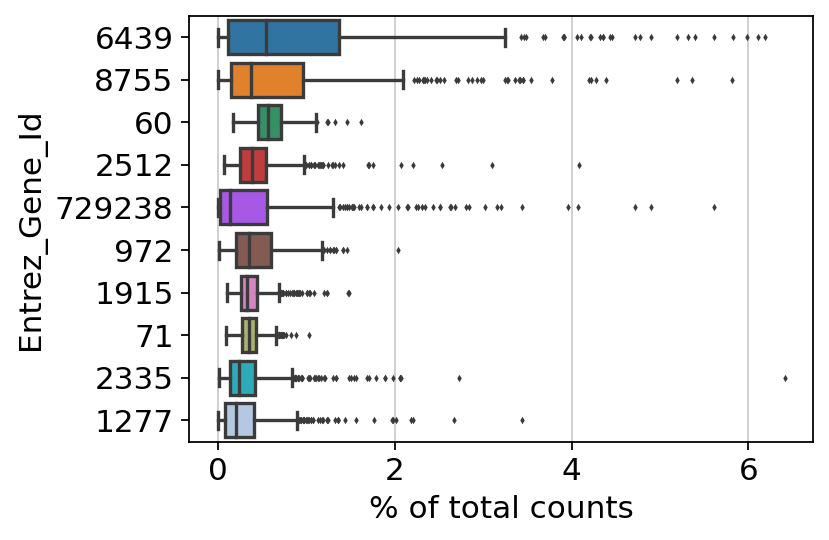

In [59]:
data = sc.AnnData(df1)
sc.pl.highest_expr_genes(data, n_top=10)

## KMeans

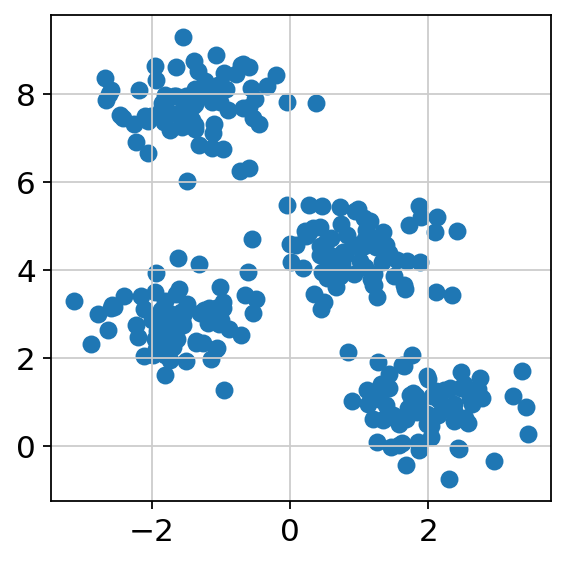

In [60]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [61]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


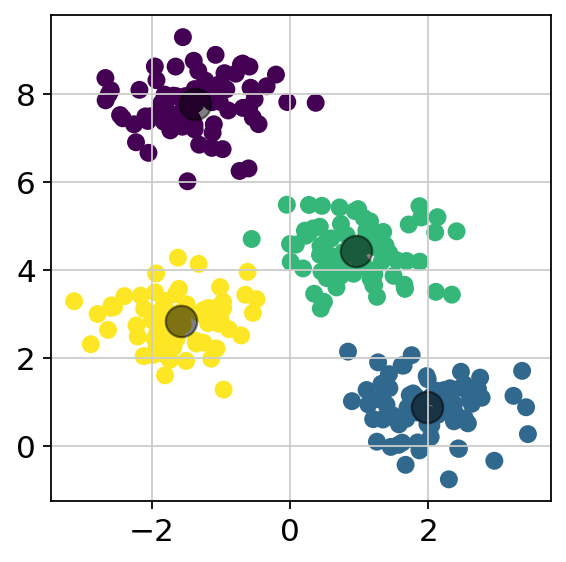

In [62]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


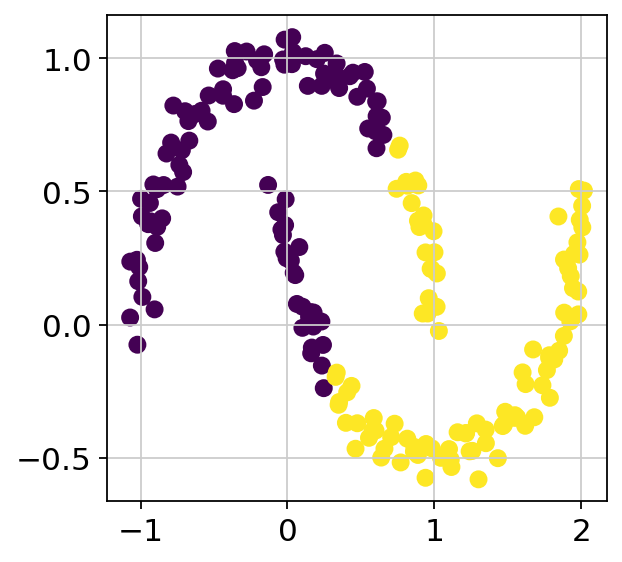

In [63]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [64]:
sc.tl.pca(data, svd_solver='arpack')
sc.pp.neighbors(data, n_neighbors=10, n_pcs=10)
sc.tl.umap(data)

computing PCA
    with n_comps=50
    finished (0:00:04)
computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


In [65]:
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


computing PCA
    with n_comps=50
    finished (0:00:04)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)
running Leiden clustering
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


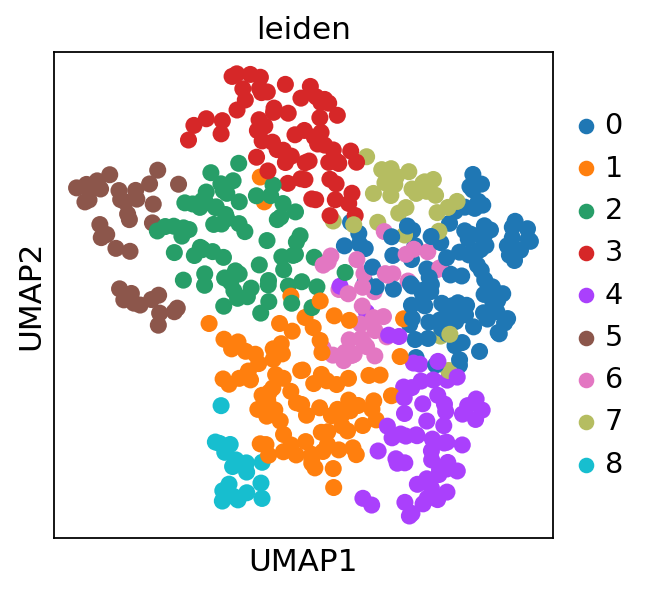

In [66]:
sc.tl.pca(data, n_comps=50)
sc.pp.neighbors(data)
sc.tl.umap(data)
sc.tl.leiden(data)
sc.pl.umap(data, color='leiden')

## Hierarchical clustering

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax =

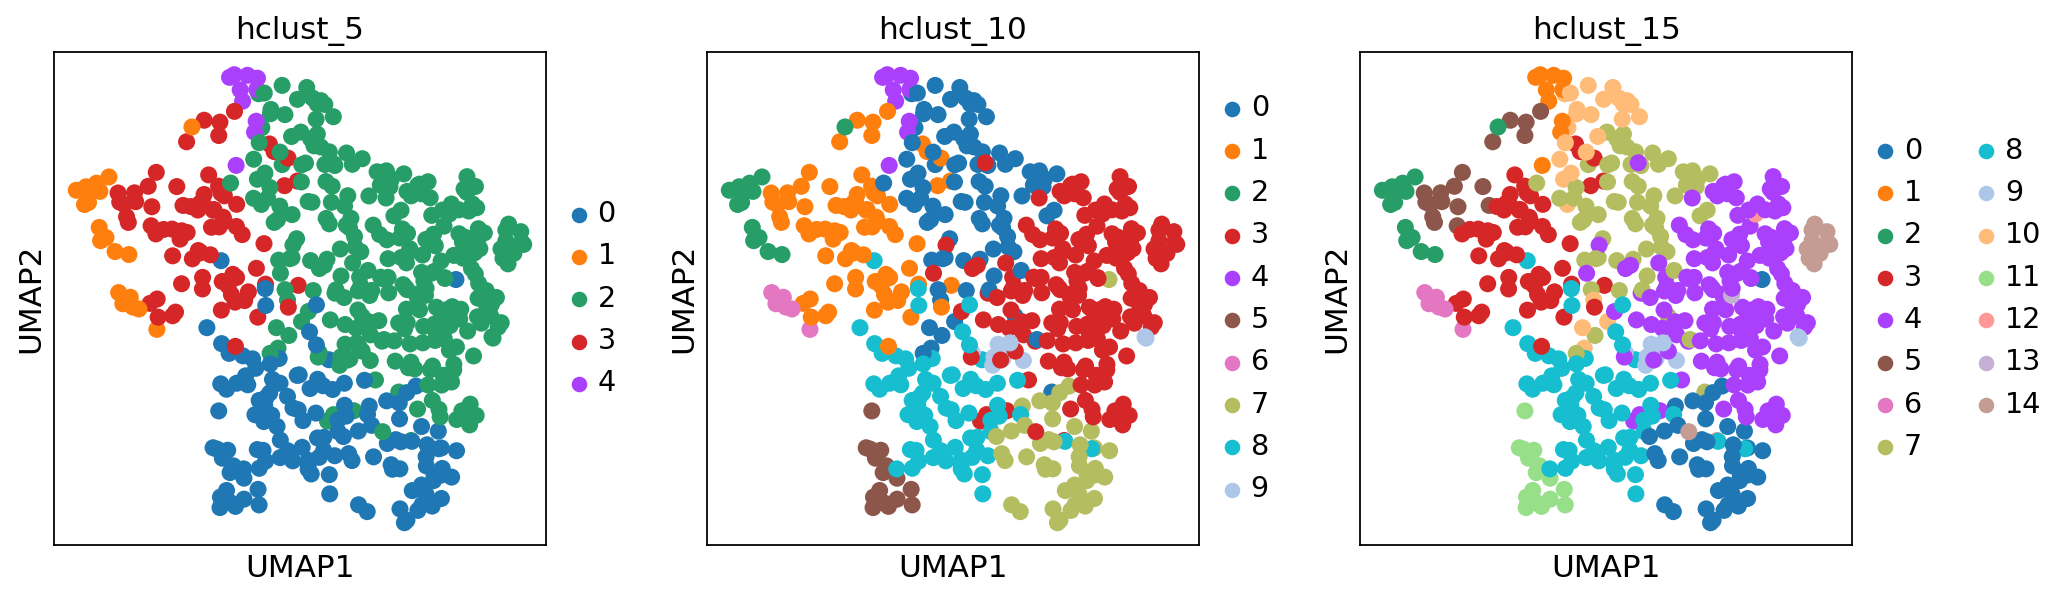

In [67]:
from sklearn.cluster import AgglomerativeClustering

X_pca = data.obsm['X_pca']
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
data.obs['hclust_5'] = cluster.fit_predict(X_pca).astype(str)

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
data.obs['hclust_10'] = cluster.fit_predict(X_pca).astype(str)

cluster = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='ward')
data.obs['hclust_15'] = cluster.fit_predict(X_pca).astype(str)


sc.pl.umap(data, color=['hclust_5', 'hclust_10', 'hclust_15'])

## DBSCN Clustering

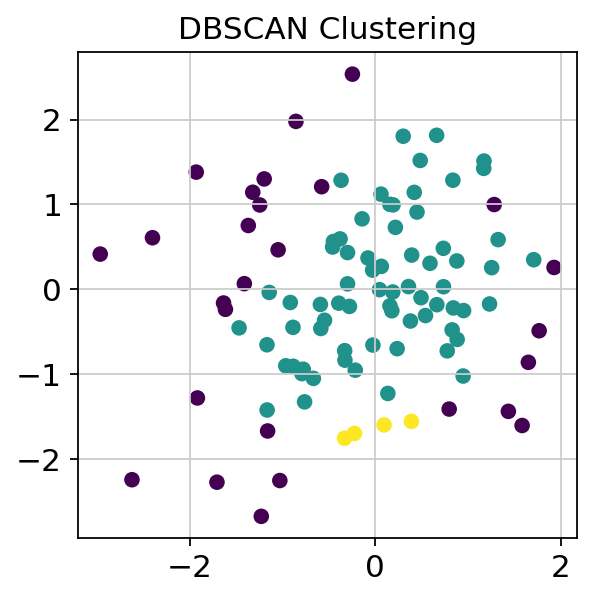

In [68]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
X = np.random.randn(100, 2)

# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=5).fit(X)
labels = db.labels_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('DBSCAN Clustering')
plt.show()


## Mean Shift Clustering

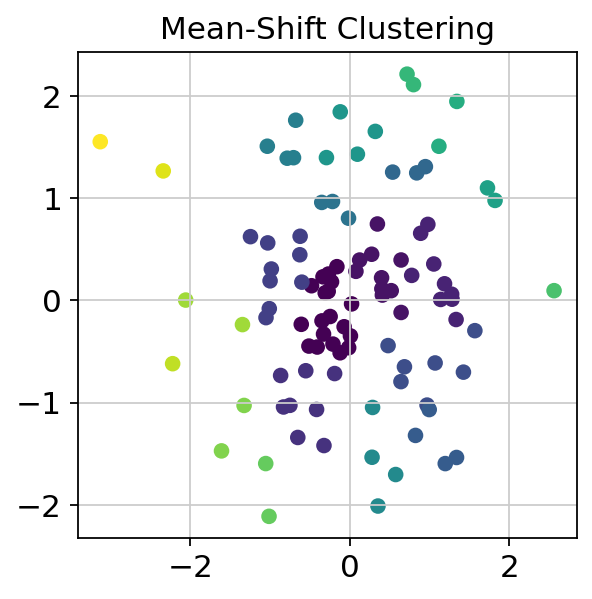

In [69]:
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
X = np.random.randn(100, 2)

# Compute Mean-Shift
ms = MeanShift(bandwidth=0.5).fit(X)
labels = ms.labels_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('Mean-Shift Clustering')
plt.show()


## GMM Clustering

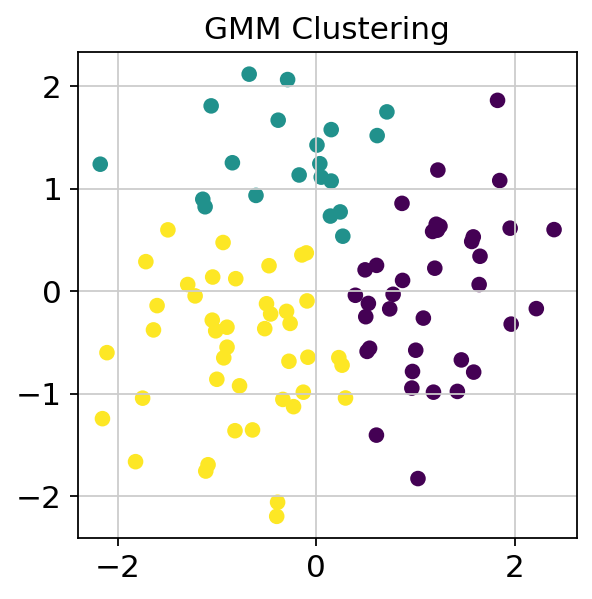

In [70]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
X = np.random.randn(100, 2)

# Compute GMM
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X)
labels = gmm.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('GMM Clustering')
plt.show()
